<a href="https://colab.research.google.com/github/mikeng07/CIFAR10-VGGNET-ML/blob/main/VGG_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, utils

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to one-hot vectors
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
"""
A MODIFIED VGGNET MODEL WITH 3 BLOCKS AND A CLASSIFIER
IT WORKS WELL FOR CIFAR10 DATASET, BUT HAS OVERFITTING PROBLEM
"""


def build_vgg_like_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()

    # First block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third block
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Classifier
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Build the model
model = build_vgg_like_model()
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")
"""

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                

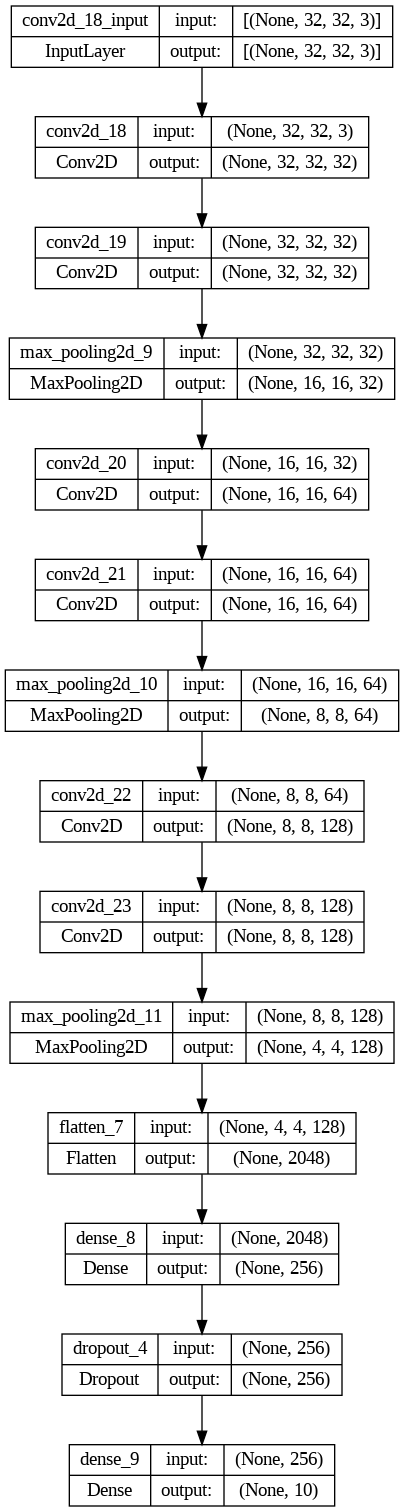

In [ ]:
"""
PLOT THE MODEL
"""
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)

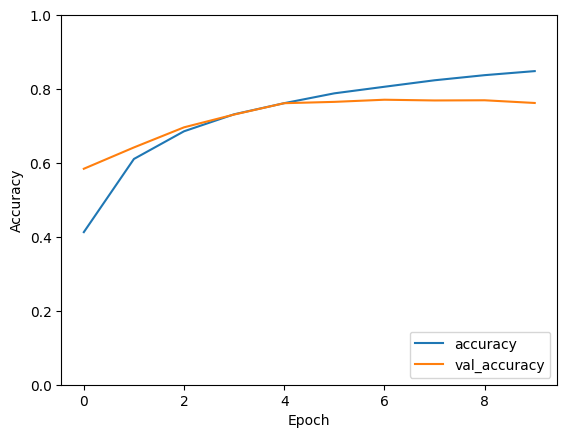

In [ ]:
"""This code block plots the acccuracy over epochs to identify overfitting"""


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()



In [ ]:
"""
  sample model performance evaluation code . gives recall percision and f1 score
"""

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict the test set
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=[str(i) for i in range(10)]))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1000
           1       0.90      0.87      0.88      1000
           2       0.64      0.69      0.66      1000
           3       0.63      0.51      0.57      1000
           4       0.64      0.80      0.71      1000
           5       0.74      0.64      0.69      1000
           6       0.78      0.86      0.82      1000
           7       0.84      0.74      0.78      1000
           8       0.82      0.90      0.86      1000
           9       0.91      0.79      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



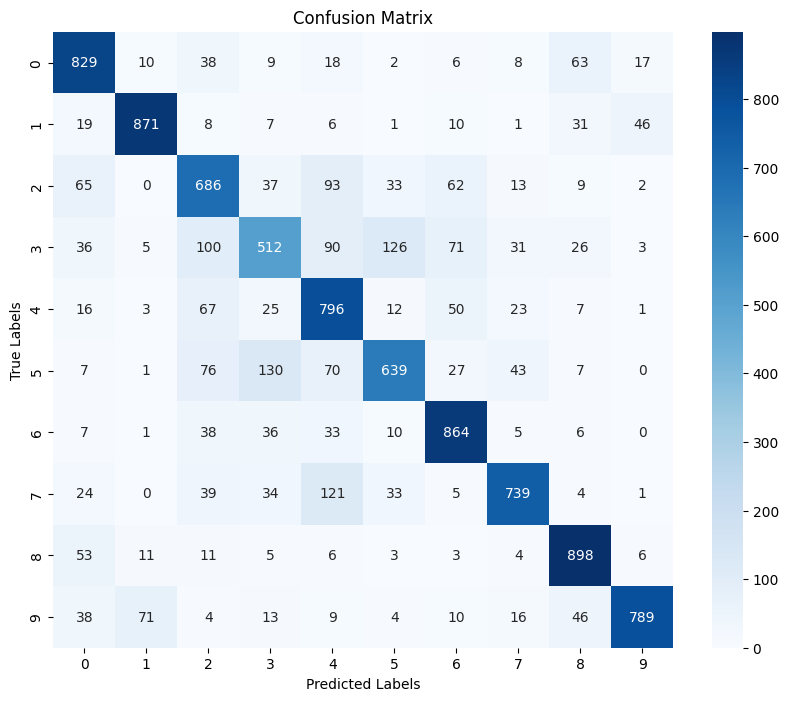

In [ ]:
"""
Compute confusion matrix
&&Plot confusion matrix
"""

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
"""THIS IS ORIGINAL MODIFIED MODEL WITH MORE EPOCHS"""

def build_vgg_like_model_with_dropout(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()

    # First block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.1))  # Add dropout after the first block

    # Second block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))  # Add dropout after the second block

    # Third block
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))  # Add dropout after the third block

    # Classifier
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.4))  # Add dropout after the first dense layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Build the model with dropout
model_with_dropout = build_vgg_like_model_with_dropout()
model_with_dropout.summary()

# Compile the model
model_with_dropout.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Train the model
history_with_dropout = model_with_dropout.fit(augmented_generator, epochs=50, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss_dropout, test_acc_dropout = model_with_dropout.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy with dropout: {test_acc_dropout}")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [ ]:
"""ATTEMP to merge a basic model with VGG19 - very bad running time."""


def build_vgg_like_model_with_dropout(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()

    # First block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.1))  # Add dropout after the first block

    # Second block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))  # Add dropout after the second block

    # Third block
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))  # Add dropout after the third block

    # Fourth block
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))  # Add dropout after the fourth block

    # Fifth block
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))  # Add dropout after the fifth block



    # Classifier
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.4))  # Add dropout after the first dense layer
    model.add(layers.Dense(num_classes, activation='softmax'))



    return model


# Build the model with dropout
model_with_dropout = build_vgg_like_model_with_dropout()
model_with_dropout.summary()

# Compile the model
model_with_dropout.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Train the model
history_with_dropout = model_with_dropout.fit(augmented_generator, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss_dropout, test_acc_dropout = model_with_dropout.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy with dropout: {test_acc_dropout}")

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_67 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_38 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_68 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_69 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

In [ ]:
"""MERGING THE MODEL"""

def merge_models(input_shape=(224, 224, 3), num_classes=10):
    # Load pre-trained VGG16 model without top layers
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze convolutional base
    for layer in base_model.layers:
        layer.trainable = False

    # Remove classifier part of VGG-like model
    vgg_like_model = build_vgg_like_model_with_dropout(input_shape=(7, 7, 512), num_classes=num_classes)

    # Combine models
    merged_model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),  # Add Global Average Pooling layer
        vgg_like_model
    ])

    return merged_model

# Build and compile the merged model
merged_model = merge_models()
merged_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Print the summary of the merged model
merged_model.summary()

# Train the model
history_merge_model = merged_model.fit(augmented_generator, epochs=50, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss_dropout, test_acc_dropout = merged_model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy with dropout: {test_acc_dropout}")


ValueError: Exception encountered when calling layer "max_pooling2d_32" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_32/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,128].

Call arguments received by layer "max_pooling2d_32" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 128), dtype=float32)

In [ ]:
""" ATTEMPT TO USE DATA AUGMENTATION """


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.05),
])

# Create an ImageDataGenerator instance with data augmentation
datagen = ImageDataGenerator(
    preprocessing_function=data_augmentation,
    # You can add more options for data preprocessing or augmentation here
)

# Fit the ImageDataGenerator to the training data
datagen.fit(train_images)

# Create a generator for augmented data
augmented_generator = datagen.flow(train_images, train_labels, batch_size=32)


In [ ]:
"""THIS ORIGNAL MODIFED MODEL WITH DROPOUT BUT LESS EPOCH"""

def build_vgg_like_model_with_dropout(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()

    # First block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.1))  # Add dropout after the first block

    # Second block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))  # Add dropout after the second block

    # Third block
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))  # Add dropout after the third block

    # Classifier
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.4))  # Add dropout after the first dense layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Build the model with dropout
model_with_dropout = build_vgg_like_model_with_dropout()
model_with_dropout.summary()

# Compile the model
model_with_dropout.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Train the model
history_with_dropout = model_with_dropout.fit(augmented_generator, epochs=50, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss_dropout, test_acc_dropout = model_with_dropout.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy with dropout: {test_acc_dropout}")


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

In [ ]:
"""ATTEMPT TO USE EARLY STOPPING"""

from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
"""THIS MODEL USING LEARNING RATE OF 0.001"""


def build_vgg_like_model_with_dropout(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()

    # First block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))  # Add dropout after the first block

    # Second block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))  # Add dropout after the second block

    # Third block
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))  # Add dropout after the third block

    # Classifier
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))  # Add dropout after the first dense layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Build the model with dropout
model_with_dropout = build_vgg_like_model_with_dropout()
model_with_dropout.summary()

# Compile the model
model_with_dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_with_dropout = model_with_dropout.fit(augmented_generator, epochs=50, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss_dropout, test_acc_dropout = model_with_dropout.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy with dropout: {test_acc_dropout}")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [ ]:
"""
PLEASE USE THE CODE BELOW
IT WILL BE THE MOST SUITABLE FOR TRAINING
"""

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance with augmentation settings
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)

# Fit the ImageDataGenerator to the training data
datagen.fit(train_images)

# Create a generator for augmented data
augmented_generator = datagen.flow(train_images, train_labels, batch_size=32)



In [ ]:
# THIS ONE WORK FINE
def build_vgg_like_model_with_dropout(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()

    # First block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.1))  # Add dropout after the first block

    # Second block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))  # Add dropout after the second block

    # Third block
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))  # Add dropout after the third block

    # Classifier
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.4))  # Add dropout after the first dense layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Build the model with dropout
model_with_dropout = build_vgg_like_model_with_dropout()
model_with_dropout.summary()

# Compile the model
model_with_dropout.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Train the model
history_with_dropout = model_with_dropout.fit(augmented_generator, epochs=100, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss_dropout, test_acc_dropout = model_with_dropout.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy with dropout: {test_acc_dropout}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

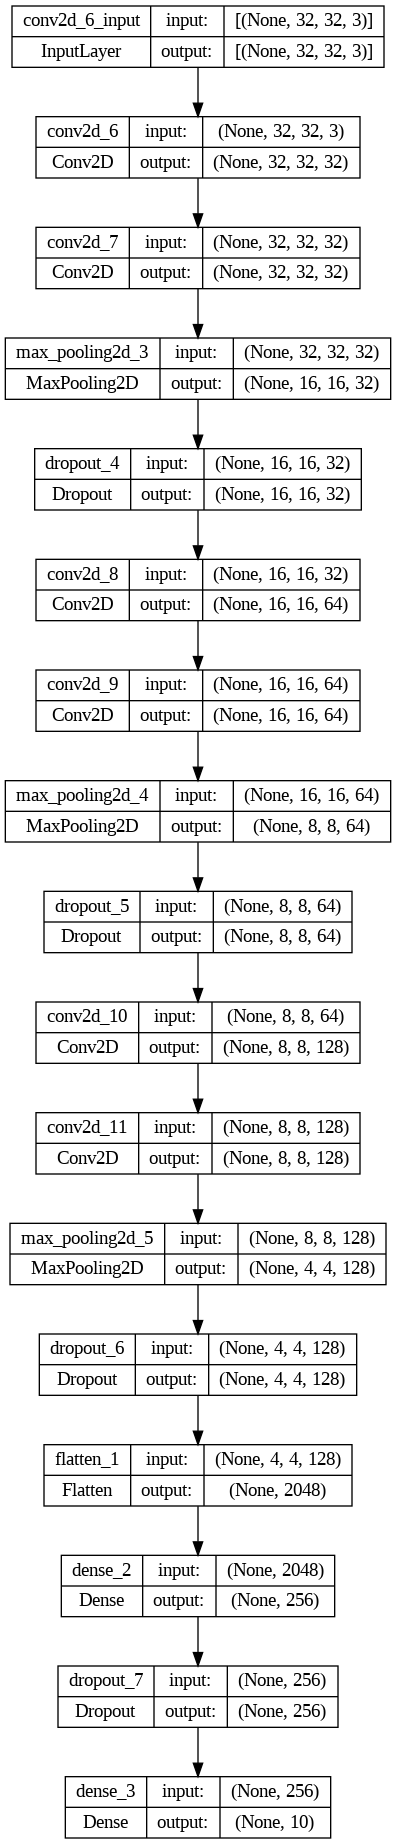

In [ ]:
#Plot the model
from tensorflow.keras.utils import plot_model
plot_model(model_with_dropout, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)

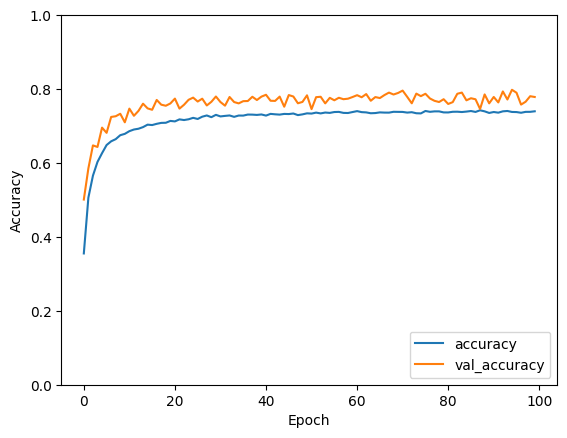

In [ ]:
plt.plot(history_with_dropout.history['accuracy'], label='accuracy')
plt.plot(history_with_dropout.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#This code block plots the acccuracy over epochs to identify overfitting

In [ ]:
#sample model performance evaluation code . gives recall percision and f1 score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict the test set
predictions = model_with_dropout.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=[str(i) for i in range(10)]))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1000
           1       0.89      0.92      0.91      1000
           2       0.85      0.61      0.71      1000
           3       0.61      0.65      0.63      1000
           4       0.81      0.71      0.76      1000
           5       0.86      0.59      0.70      1000
           6       0.61      0.94      0.74      1000
           7       0.80      0.86      0.83      1000
           8       0.89      0.85      0.87      1000
           9       0.76      0.93      0.84      1000

    accuracy                           0.78     10000
   macro avg       0.80      0.78      0.78     10000
weighted avg       0.80      0.78      0.78     10000



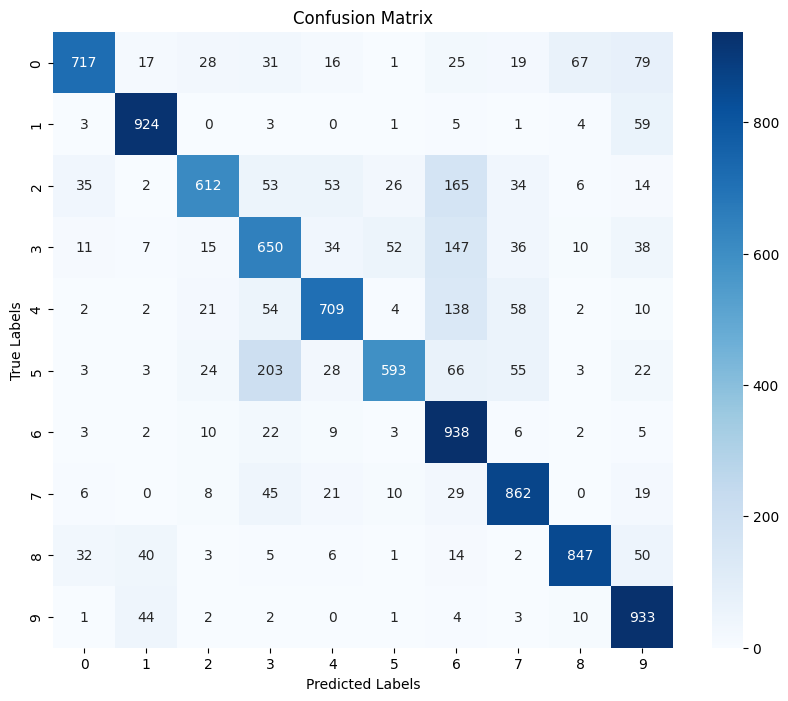

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
